In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
from collections import OrderedDict

pd.options.display.mpl_style = 'default'


%matplotlib inline

matplotlib.rcParams.update({'font.family': "serif"})

28.830382 29.713221
108.430583 110.337983
227.610302 229.123468
539.086179 541.644172


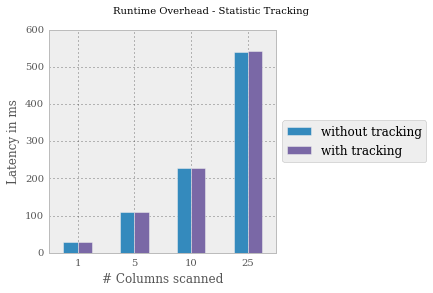

In [18]:
columns = [1,5,10,25]

index = pd.MultiIndex(levels=[[columns], [u'without tracking', u'with tracking']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3],  [0, 1, 0, 1, 0, 1, 0, 1]],
           names=[u'# Columns scanned', u'key type'])


values = []

for column in columns:

    withoutTracking = pd.DataFrame()
    withTracking = pd.DataFrame()


    withoutTracking = withoutTracking.append(pd.read_csv("results-without-tracking2/%d_columns.csv"%(column),header=False,names=["WithoutTracking"]),True)
    withTracking = withTracking.append(pd.read_csv("results-with-tracking/%d_columns.csv"%(column),header=False,names=["WithTracking"]),True)


    values.extend([withoutTracking.median()[0], withTracking.median()[0]])
    print(withoutTracking.median()[0],withTracking.median()[0])


s = pd.Series(values, index=index)

df = pd.DataFrame()
pd.set_option('display.multi_sparse', False)


s.unstack(1)
df = s.unstack(1)
df.plot(kind='bar', rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.subplots_adjust(right=0.65)
plt.ylabel("Latency in ms")
plt.suptitle("Runtime Overhead - Statistic Tracking")